# Bike Sharing Assignment

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 

The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Build a multiple linear regression model to find the demand for shared bikes with the available independent variables. 

Steps to build the required model:
    1. Import the required libraries
    2. Data Understanding 
    3. Data Visualization
    4. Data Preparation for modelling
    5. Data Modelling
    6. Model Evaluation
    7. Final conclusions and Recommendations
    

# Step 1: Importing the libraries

In [279]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [280]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 2: Data Understanding

In [281]:
# Read the dataset
bike_data=pd.read_csv("day.csv")

In [282]:
# inspect the first five rows of data
bike_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspecting the various aspects of the 'bike_data' dataframe

In [283]:
# check the no of rows and columns
bike_data.shape

(730, 16)

In [284]:
#info all the entire data along with types
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 88.4+ KB


In [285]:
#Summary of the numerical columns in the dataframe
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [286]:
# check if any null values are present in the data
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No NULL values present !!!

In [287]:
## identification of categorical and continuous variables
cols = bike_data.columns
cols

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Based on the columns annd the data set charatcterstics we identify the
1. Categorical features as : season, mnth, weekday, weathersit.
2. Continuous features as: temp, atemp, hum, windspeed
3. Binary features as: holiday, yr, working day
4. Target feature as: cnt



## Dropping the features which might not be useful in model building or the features data may not be available at the time of dataset creation(data gathering)

In [288]:
#Dropping columns "instant","dteday","casual","registered"
bike_data = bike_data.drop(['instant','dteday','casual','registered'],axis=1)


## Checking the datatypes of all the columns and making necessary changes if required.

In [289]:
bike_data.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [290]:
# Changing the data type of categorical variables from int to object
bike_data["season"]= bike_data["season"].astype(str)
bike_data["mnth"]= bike_data["mnth"].astype(str)
bike_data["weekday"]= bike_data["weekday"].astype(str)
bike_data["weathersit"]= bike_data["weathersit"].astype(str)

# Step 3: Data Visualization

LLet's now spend some time doing what is arguably the most important step - understanding the data.

1. If there is some obvious multicollinearity going on, this is the first place to catch it
2. Here's where you'll also identify if some predictors directly have a strong association with the outcome variable.

We'll visualise our data using matplotlib and seaborn

#### Visualising Numeric Variables
Let's make a pairplot of the numeric variables 

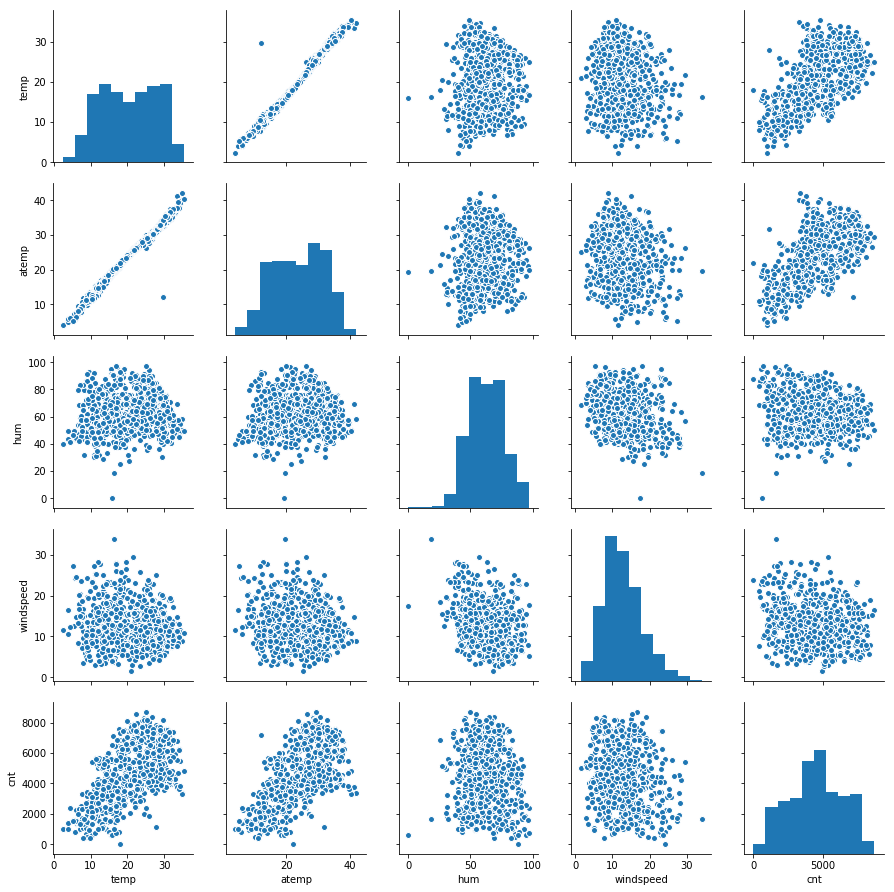

In [291]:
num_data=bike_data[['temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(num_data)
plt.show()

Observations : 
1. We can see 'temp' and 'atemp' columns are highly correlated with 'cnt' and have linear relation between them.

#### Therefore Linear regession can be considered as there are atleast few variables which have linear relationship¶

#### Visualising Categorical Variables

As there are a few categorical variables. Let's make a boxplot for some of these variables as visualize them

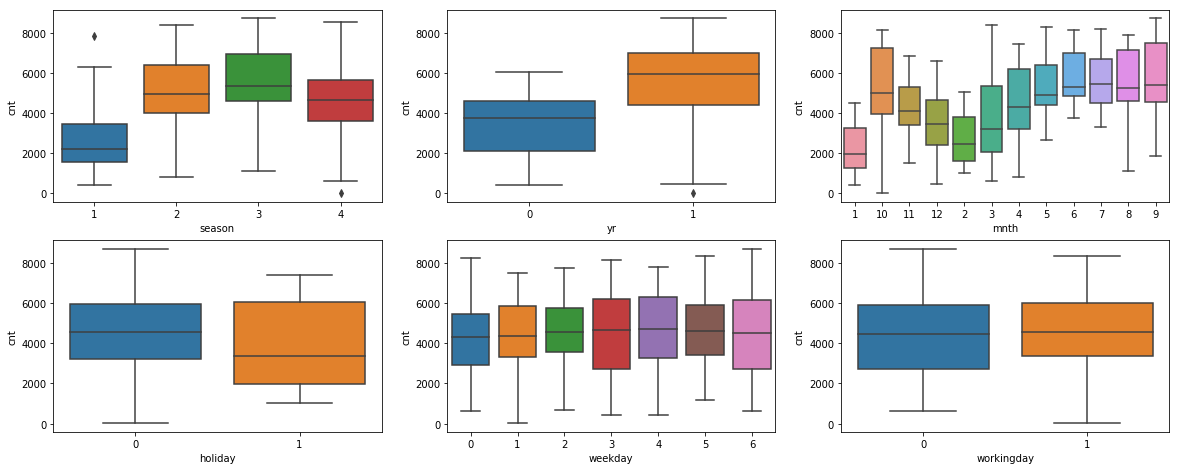

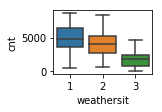

In [292]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

Observation:
    1. The season box plots indicates that more bikes are rent during season 3 which is fall season.
    2. The year box plots indicates that more bikes are rent during 2019.
    3. The month box plots indicates that maximum bikes are rent during september month.
    4. The holiday box plot is widely spread on a when its values is 1 ie. if it is a holiday.
    5. The weekday box plots indicates that more bikes are rent during saturday.
    6. The working day box plot is widely spread on a when its values is 0 ie. if it is a non wokring day.
    7. The weathersit box plots indicates that more bikes are rent during Clear, Few clouds, Partly cloudy weather.

### Correlations for all the variables

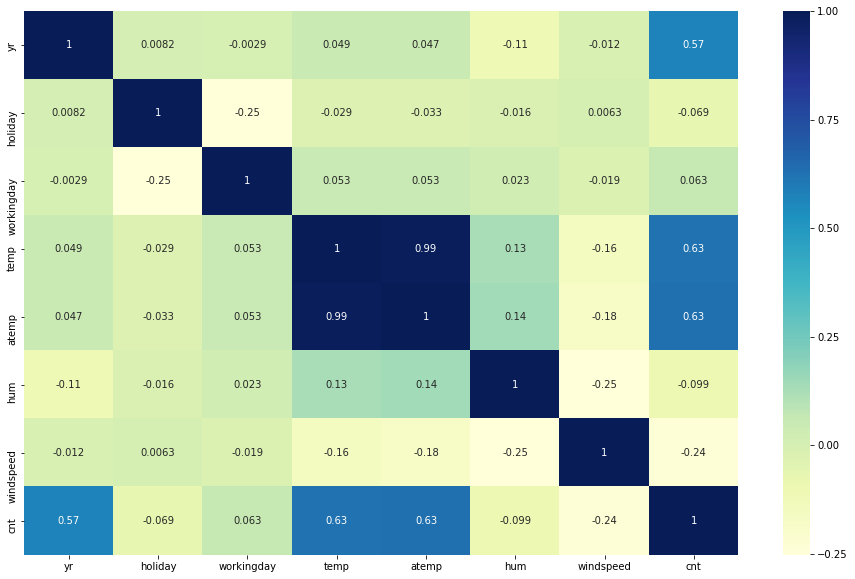

In [293]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Correlations for numeric variables

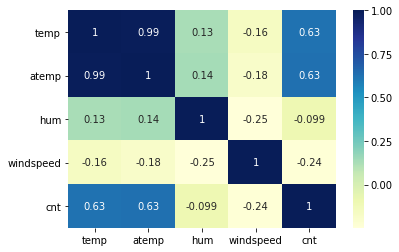

In [294]:
#Correlations for numeric variables
cor=num_data.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

As correlation between temp and atemp is very high we can drop either of them. 
atemp can be dropped as feeling temperature might shitly vary from person to person and gettgng that data might be a bit difficult.

In [295]:
# Dropping the season column as dummies for that feature has been created.
bike_data=bike_data.drop('atemp',axis=1)

### All the visualization graphs their interpretation and correlation detail signifies that linear regression can be done to obtain the desired model


# Step 4: Data Preparation for modelling

## Creating dummy variables for all the categorical data

### Dummy variables creation for feature Season

In [296]:
# List of variables to map
def map_function(x):
    return x.map({'1':'Season_Spring','2':'Season_Summer','3':'Season_Fall','4':'Season_Winter'})

bike_data['season'] = bike_data[['season']].apply(map_function)

In [297]:
bike_data.season.value_counts()

Season_Fall      188
Season_Summer    184
Season_Spring    180
Season_Winter    178
Name: season, dtype: int64

In [298]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy'
season_dummy=pd.get_dummies(bike_data['season'],drop_first=True)

In [299]:
# Check what the dataset 'season_dummy' looks like
season_dummy.head()

,Season_Spring,Season_Summer,Season_Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Interpretation : Season_Fall is represented when above Season_Spring, Season_Summer, Season_Winter are 0,0,0 

In [300]:
# Adding the season_dummy to the original'bike_data' dataframe
bike_data=pd.concat([bike_data,season_dummy],axis=1)


In [301]:
# Dropping the season column as dummies for that feature has been created.
bike_data=bike_data.drop('season',axis=1)

In [302]:
# Checking the original dataframe
bike_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Season_Spring,Season_Summer,Season_Winter
0,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0


### Dummy variables creation for feature 'mnth'

In [303]:
# List of variables to map
def month_map(x):
    return x.map({'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'})

bike_data['mnth'] = bike_data[['mnth']].apply(month_map)

In [304]:
bike_data.mnth.value_counts()

March        62
May          62
October      62
January      62
August       62
December     62
July         62
September    60
April        60
June         60
November     60
February     56
Name: mnth, dtype: int64

In [305]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_dummy'
mnth_dummy=pd.get_dummies(bike_data['mnth'],drop_first=True)

In [306]:
# Check what the dataset 'mnth_dummy' looks like
mnth_dummy.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [307]:
# Adding the mnth_dummy to the original'bike_data' dataframe
bike_data=pd.concat([bike_data,mnth_dummy],axis=1)

In [308]:
# Dropping the season mnth as dummies for that feature has been created.
bike_data=bike_data.drop('mnth',axis=1)

In [309]:
# Checking the original dataframe
bike_data.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Season_Spring,...,December,February,January,July,June,March,May,November,October,September
0,0,0,6,0,2,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


### Dummy variables creation for feature weekday

In [310]:
def weekday_map(x):
    return x.map({'0':'Sunday','1':'Monday','2':'Tuesday','3':'Wednesday','4':'Thursday','5':'Friday','6':'saturday'})

bike_data['weekday'] = bike_data[['weekday']].apply(weekday_map)

In [311]:
bike_data.weekday.value_counts()

Monday       105
Sunday       105
saturday     105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

In [312]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_dummy'
weekday_dummy=pd.get_dummies(bike_data['weekday'],drop_first=True)

In [313]:
# Check what the dataset 'weekday_dummy' looks like
weekday_dummy.head()

,Monday,Sunday,Thursday,Tuesday,Wednesday,saturday
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [314]:
# Adding the weekday_dummy to the original'bike_data' dataframe
bike_data=pd.concat([bike_data,weekday_dummy],axis=1)

In [315]:
# Dropping the feature weekday as dummies for that feature has been created.
bike_data=bike_data.drop('weekday',axis=1)

In [316]:
# Checking the original dataframe
bike_data.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Season_Spring,Season_Summer,...,May,November,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,saturday
0,0,0,0,2,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


### Dummy variables creation for feature 'weathersit'

In [317]:
def weathersit_map(x):
    return x.map({'1':'Clear_partly_cloudy','2':'Mist_Cloudy','3':'Light_Snow_Rain','4':'Heavy_Rain'})

bike_data['weathersit'] = bike_data[['weathersit']].apply(weathersit_map)

In [318]:
bike_data.weathersit.value_counts()

Clear_partly_cloudy    463
Mist_Cloudy            246
Light_Snow_Rain         21
Name: weathersit, dtype: int64

In [319]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dummy'
weathersit_dummy=pd.get_dummies(bike_data['weathersit'],drop_first=True)

In [320]:
# Check what the dataset 'weathersit_dummy' looks like
weathersit_dummy.head()

,Light_Snow_Rain,Mist_Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [321]:
# Adding the weathersit_dummy to the original'bike_data' dataframe
bike_data=pd.concat([bike_data,weathersit_dummy],axis=1)

In [322]:
# Dropping the weathersit as dummies for that feature has been created.
bike_data=bike_data.drop('weathersit',axis=1)

In [323]:
# Checking the original dataframe
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Season_Spring,Season_Summer,Season_Winter,...,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,saturday,Light_Snow_Rain,Mist_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [324]:
#No need to create dummies for workingday as it is binary
bike_data.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [325]:
#No need to create dummies for holiday as it is binary
bike_data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [326]:
#No need to create dummies for yr as it is binary
bike_data.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [327]:
#Final data afer creating dummies
bike_data.shape

(730, 29)

In [328]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
yr                 730 non-null int64
holiday            730 non-null int64
workingday         730 non-null int64
temp               730 non-null float64
hum                730 non-null float64
windspeed          730 non-null float64
cnt                730 non-null int64
Season_Spring      730 non-null uint8
Season_Summer      730 non-null uint8
Season_Winter      730 non-null uint8
August             730 non-null uint8
December           730 non-null uint8
February           730 non-null uint8
January            730 non-null uint8
July               730 non-null uint8
June               730 non-null uint8
March              730 non-null uint8
May                730 non-null uint8
November           730 non-null uint8
October            730 non-null uint8
September          730 non-null uint8
Monday             730 non-null uint8
Sunday             730 non-null uint8
Thursday       

## Spliting data into Training and Testing Sets

In [329]:
#split the data into bike_train and bike_test
np.random.seed(0)
bike_train,bike_test = train_test_split(bike_data, train_size=0.7,random_state=100)
print(bike_train.shape)
print(bike_train.shape)

(510, 29)
(510, 29)


In [330]:
# display the first five rows of train dataframe
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Season_Spring,Season_Summer,Season_Winter,...,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,saturday,Light_Snow_Rain,Mist_Cloudy
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,1,0,1
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [331]:
# display the first five rows of test dataframe
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Season_Spring,Season_Summer,Season_Winter,...,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,saturday,Light_Snow_Rain,Mist_Cloudy
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,1,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [332]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
yr                 510 non-null int64
holiday            510 non-null int64
workingday         510 non-null int64
temp               510 non-null float64
hum                510 non-null float64
windspeed          510 non-null float64
cnt                510 non-null int64
Season_Spring      510 non-null uint8
Season_Summer      510 non-null uint8
Season_Winter      510 non-null uint8
August             510 non-null uint8
December           510 non-null uint8
February           510 non-null uint8
January            510 non-null uint8
July               510 non-null uint8
June               510 non-null uint8
March              510 non-null uint8
May                510 non-null uint8
November           510 non-null uint8
October            510 non-null uint8
September          510 non-null uint8
Monday             510 non-null uint8
Sunday             510 non-null uint8
Thursday     

In [333]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
yr                 220 non-null int64
holiday            220 non-null int64
workingday         220 non-null int64
temp               220 non-null float64
hum                220 non-null float64
windspeed          220 non-null float64
cnt                220 non-null int64
Season_Spring      220 non-null uint8
Season_Summer      220 non-null uint8
Season_Winter      220 non-null uint8
August             220 non-null uint8
December           220 non-null uint8
February           220 non-null uint8
January            220 non-null uint8
July               220 non-null uint8
June               220 non-null uint8
March              220 non-null uint8
May                220 non-null uint8
November           220 non-null uint8
October            220 non-null uint8
September          220 non-null uint8
Monday             220 non-null uint8
Sunday             220 non-null uint8
Thursday     

## Rescaling the numerical features

Scaling using MinMax scaling

In [334]:
#1. Instantiate an object
scaler=MinMaxScaler()

In [335]:
# Applyong the scaler object to all the numerical columns
num_col = ['temp','hum','windspeed','cnt']
# fitting on data
bike_train[num_col]=scaler.fit_transform(bike_train[num_col])
    

In [336]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Season_Spring,Season_Summer,Season_Winter,...,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,saturday,Light_Snow_Rain,Mist_Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [337]:
#verifying the scaling
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Season_Spring,Season_Summer,Season_Winter,...,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,saturday,Light_Snow_Rain,Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.143137,0.133333,0.131373,0.158824,0.154902,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.350557,0.340268,0.338139,0.365870,0.362166,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### The data is scaled rightly!!!!

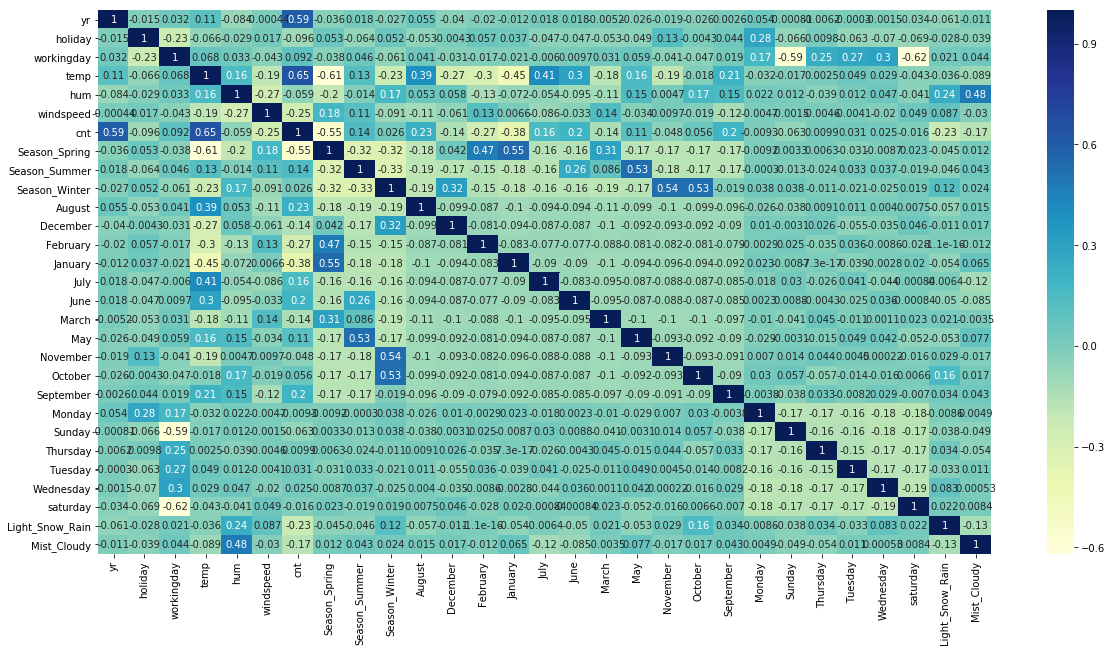

In [338]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Observations: yr, temp seems to the correlated to cnt the most.

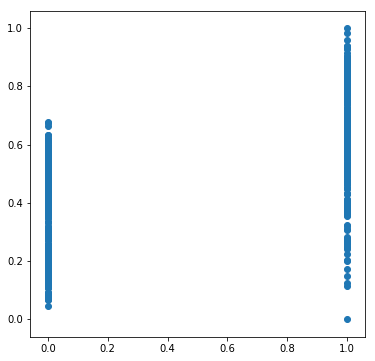

In [339]:
#plot between yr and cnt
plt.figure(figsize=[6,6])
plt.scatter(bike_train.yr, bike_train.cnt)
plt.show()

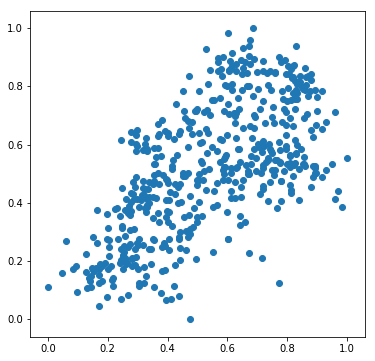

In [340]:
#plot between temp and cnt
plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

## Dividing into data into x and Y sets for the model building

In [341]:
y_train=bike_train.pop('cnt')
X_train=bike_train

In [342]:
# verify the X_train to check if cnt column is removed
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Season_Spring,Season_Summer,Season_Winter,August,...,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,saturday,Light_Snow_Rain,Mist_Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [343]:
# verifying the y_train to check if it has only cnt
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

# Step 5:Data Modelling [Building a Multi Linear Regression Model]

Used the mixed approach to build a Model

RFE first and then followed by the manual approach

### RFE
Recursive feature elimination

In [344]:
# Running RFE with the output number of variables equal to 18
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,18)
rfe=rfe.fit(X_train,y_train)

In [345]:
#display the columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Season_Spring', True, 1),
 ('Season_Summer', True, 1),
 ('Season_Winter', True, 1),
 ('August', False, 3),
 ('December', True, 1),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 7),
 ('March', False, 9),
 ('May', False, 2),
 ('November', True, 1),
 ('October', False, 5),
 ('September', True, 1),
 ('Monday', False, 6),
 ('Sunday', True, 1),
 ('Thursday', False, 10),
 ('Tuesday', False, 11),
 ('Wednesday', False, 8),
 ('saturday', True, 1),
 ('Light_Snow_Rain', True, 1),
 ('Mist_Cloudy', True, 1)]

In [346]:
# Features which can be included to make the model according to RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'December',
       'January', 'July', 'November', 'September', 'Sunday', 'saturday',
       'Light_Snow_Rain', 'Mist_Cloudy'],
      dtype='object')

In [347]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['August', 'February', 'June', 'March', 'May', 'October', 'Monday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

## Building model using statsmodel
It is use as we can get detailed statistics infomation

## Model 1

In [348]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 =X_train[col]

In [349]:
#adding a constant varible [stats model doesnt add implicitly a constant]
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [350]:
#buiding the model
lm1 = sm. OLS(y_train,X_train_rfe1).fit()

In [351]:

#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.52e-190
Time:                        15:05:35   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2299      0.029     

In [352]:
X_train_rfe1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'December',
       'January', 'July', 'November', 'September', 'Sunday', 'saturday',
       'Light_Snow_Rain', 'Mist_Cloudy'],
      dtype='object')

### We see that the r square value is 0.85. and there are few features with undesireable p values. Lets even calculate the VIF value

In [353]:
X_train_rfe1 = X_train_rfe1.drop(['const'],axis=1)

In [354]:
# calculate the VIF for model 1
vif =pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by ='VIF', ascending=False)
vif

,Features,VIF
2,workingday,56.18
15,saturday,13.49
14,Sunday,12.86
6,Season_Spring,5.27
3,temp,4.43
8,Season_Winter,3.83
1,holiday,3.20
7,Season_Summer,2.77
4,hum,1.94
12,November,1.77


## Model 2:
As holiday features as it is insignificant(p value is high) we are dropping the model


In [355]:
X_train_rfe2= X_train_rfe1.drop(["holiday"], axis = 1)

In [356]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe2 = sm.add_constant(X_train_rfe2)

In [357]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model

In [358]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.52e-190
Time:                        15:05:36   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2235      0.044     

In [359]:
X_train_rfe2 = X_train_rfe2.drop(['const'], axis=1)

In [360]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.19
2,temp,21.56
1,workingday,18.84
5,Season_Spring,5.06
14,saturday,5.03
4,windspeed,4.99
13,Sunday,4.83
7,Season_Winter,4.40
6,Season_Summer,3.09
16,Mist_Cloudy,2.35


## Model 3:
As hum features as its vif is hery high we are dropping the model

In [361]:
X_train_rfe3 = X_train_rfe2.drop(["hum"], axis = 1)

In [362]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe3 = sm.add_constant(X_train_rfe3)

In [363]:
lm3 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model

In [364]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          4.83e-188
Time:                        15:05:37   Log-Likelihood:                 515.05
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     493   BIC:                            -924.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1542      0.041     

In [365]:
X_train_rfe3 = X_train_rfe3.drop(['const'], axis=1)

In [366]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,17.17
2,temp,13.62
3,windspeed,4.85
13,saturday,4.70
12,Sunday,4.39
4,Season_Spring,4.24
6,Season_Winter,3.71
5,Season_Summer,2.78
0,yr,2.08
10,November,1.80


### Model 4:
As 'workingday' feature VIF value is high we are dropping the model

In [367]:
X_train_rfe4 = X_train_rfe3.drop(["workingday"], axis = 1)

In [368]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe4 = sm.add_constant(X_train_rfe4)

In [369]:
lm4 = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model

In [370]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          3.92e-186
Time:                        15:05:38   Log-Likelihood:                 507.78
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     494   BIC:                            -915.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2513      0.032     

In [371]:
X_train_rfe4 = X_train_rfe4.drop(['const'], axis=1)

In [372]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.25
2,windspeed,4.69
5,Season_Winter,3.00
3,Season_Spring,2.91
4,Season_Summer,2.25
0,yr,2.07
9,November,1.79
7,January,1.66
8,July,1.60
14,Mist_Cloudy,1.57


### Model 5:
As 'Season_Summer' feature p value is high we are dropping the model

In [373]:
X_train_rfe5 = X_train_rfe4.drop(["Season_Summer"], axis = 1)

In [374]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe5 = sm.add_constant(X_train_rfe5)

In [375]:
lm5 = sm.OLS(y_train,X_train_rfe5).fit() 

In [376]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.7
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          3.59e-186
Time:                        15:05:39   Log-Likelihood:                 505.14
No. Observations:                 510   AIC:                            -980.3
Df Residuals:                     495   BIC:                            -916.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2962      0.025     

In [377]:
X_train_rfe5 = X_train_rfe5.drop(['const'], axis=1)

In [378]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.78
2,windspeed,4.09
4,Season_Winter,2.59
3,Season_Spring,2.37
0,yr,2.06
8,November,1.79
6,January,1.65
13,Mist_Cloudy,1.53
5,December,1.47
7,July,1.36


## Model 6
Saturday feature is insignificant so dropping it

In [379]:
X_train_rfe6 = X_train_rfe5.drop(["saturday"], axis = 1)

In [380]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe6 = sm.add_constant(X_train_rfe6)

In [381]:
lm6 = sm.OLS(y_train,X_train_rfe6).fit() 

In [382]:
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.4
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          6.31e-187
Time:                        15:05:40   Log-Likelihood:                 504.18
No. Observations:                 510   AIC:                            -980.4
Df Residuals:                     496   BIC:                            -921.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2989      0.025     

In [383]:
X_train_rfe6 = X_train_rfe6.drop(['const'], axis=1)

In [384]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.73
2,windspeed,4.05
4,Season_Winter,2.58
3,Season_Spring,2.36
0,yr,2.06
8,November,1.79
6,January,1.65
12,Mist_Cloudy,1.53
5,December,1.46
7,July,1.36


## Model 7
December feature is insignificant so dropping it

In [385]:
X_train_rfe7 = X_train_rfe6.drop(["December"], axis = 1)

In [386]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe7 = sm.add_constant(X_train_rfe7)

In [387]:
lm7 = sm.OLS(y_train,X_train_rfe7).fit() 

In [388]:
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          4.10e-186
Time:                        15:05:40   Log-Likelihood:                 499.47
No. Observations:                 510   AIC:                            -972.9
Df Residuals:                     497   BIC:                            -917.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2782      0.025     

In [389]:
X_train_rfe7 = X_train_rfe7.drop(['const'], axis=1)

In [390]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.71
2,windspeed,4.05
3,Season_Spring,2.25
0,yr,2.06
4,Season_Winter,1.94
5,January,1.60
7,November,1.57
11,Mist_Cloudy,1.53
6,July,1.36
8,September,1.20


## Model 8
November feature is insignificant so dropping it

In [391]:
X_train_rfe8 = X_train_rfe7.drop(["November"], axis = 1)

In [392]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe8 = sm.add_constant(X_train_rfe8)
lm8 = sm.OLS(y_train,X_train_rfe8).fit() 
#Let's see the summary of our linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.99e-186
Time:                        15:05:41   Log-Likelihood:                 497.39
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2732      0.025     

In [393]:
X_train_rfe8 = X_train_rfe8.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.69
2,windspeed,4.01
3,Season_Spring,2.25
0,yr,2.06
5,January,1.60
10,Mist_Cloudy,1.53
4,Season_Winter,1.40
6,July,1.36
7,September,1.20
8,Sunday,1.17


## Model 9
Dropping january features has p value is high

In [394]:
X_train_rfe9 = X_train_rfe8.drop(["January"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe9 = sm.add_constant(X_train_rfe9)
lm9 = sm.OLS(y_train,X_train_rfe9).fit() 
#Let's see the summary of our linear model
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.75e-186
Time:                        15:05:42   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2586      0.024     

In [395]:
X_train_rfe9 = X_train_rfe9.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.67
2,windspeed,4.00
0,yr,2.06
3,Season_Spring,1.64
9,Mist_Cloudy,1.52
4,Season_Winter,1.40
5,July,1.35
6,September,1.20
7,Sunday,1.17
8,Light_Snow_Rain,1.08


## This model satisfies our requirements

The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only
1. r squared greater that 83 -> 83.2
2. All the p values below 0.00
3. All the VIF values below 5

In [396]:
X_train_rfe9.columns

Index(['yr', 'temp', 'windspeed', 'Season_Spring', 'Season_Winter', 'July',
       'September', 'Sunday', 'Light_Snow_Rain', 'Mist_Cloudy'],
      dtype='object')

# Residual Analysis of the train data

#### Checking if the error terms are also normally distributed which is one of the major assumptions of linear regression.
plotting the histogram of the error terms and see what it looks like.

In [397]:
X_train_rfe9.shape

(510, 10)

In [398]:
X_train_rfe9 = sm.add_constant(X_train_rfe9)

In [399]:
y_train_cnt = lm9.predict(X_train_rfe9)

Text(0.5,0,'Errors')

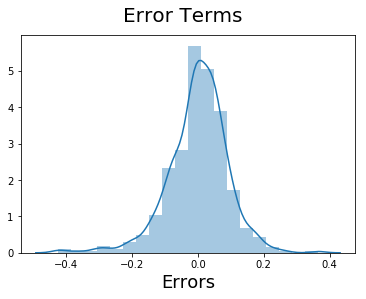

In [400]:

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

# Making Predictions using Final Model

In [401]:
# Applying the scaling on the test sets
#1. Instantiate an object
scaler=MinMaxScaler()


In [402]:
# Applyong the scaler object to all the numerical columns
num_col = ['temp','hum','windspeed','cnt']
# fitting on data
bike_test[num_col]=scaler.fit_transform(bike_test[num_col])

In [403]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Season_Spring,Season_Summer,Season_Winter,...,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,saturday,Light_Snow_Rain,Mist_Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.508362,0.418803,0.517923,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.145455,0.163636,0.168182,0.100000,0.118182,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.248645,0.200875,0.187683,0.239498,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.353363,0.370789,0.374881,0.300684,0.323559,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.361079,0.284201,0.361045,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.491299,0.403318,0.520681,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.650989,0.523975,0.687956,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [404]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [405]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,Season_Spring,Season_Summer,Season_Winter,August,...,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,saturday,Light_Snow_Rain,Mist_Cloudy
184,0,1,0,0.837241,0.534223,0.149393,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.470417,0.231142,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.496221,0.777843,0.443398,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
221,0,0,1,0.890387,0.236659,0.449707,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.821739,0.070765,0.682387,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [406]:
y_test.head()

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64

In [407]:
X_train_rfe9.columns

Index(['const', 'yr', 'temp', 'windspeed', 'Season_Spring', 'Season_Winter',
       'July', 'September', 'Sunday', 'Light_Snow_Rain', 'Mist_Cloudy'],
      dtype='object')

In [408]:
X_train_rfe9 = X_train_rfe9.drop(['const'], axis=1)

## Using our model 9 to make predictions.

In [409]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe9.columns]

In [410]:
 #Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [411]:
X_test_new.head()

,const,yr,temp,windspeed,Season_Spring,Season_Winter,July,September,Sunday,Light_Snow_Rain,Mist_Cloudy
184,1.0,0,0.837241,0.149393,0,0,1,0,0,0,1
535,1.0,1,0.911423,0.231142,0,0,0,0,0,0,0
299,1.0,0,0.496221,0.443398,0,1,0,0,0,0,1
221,1.0,0,0.890387,0.449707,0,0,0,0,0,0,0
152,1.0,0,0.821739,0.682387,0,0,0,0,0,0,0


In [412]:
# Making predictions
y_test_pred = lm9.predict(X_test_new)

In [413]:
y_test_pred.head()

184    0.464258
535    0.870088
299    0.383177
221    0.595235
152    0.531572
dtype: float64

# Step 6: Model Evaluation

In [414]:
from sklearn.metrics import r2_score
r2_score(y_true= y_test ,y_pred=y_test_pred)

0.7968683846636843

Text(0,0.5,'y_test_pred')

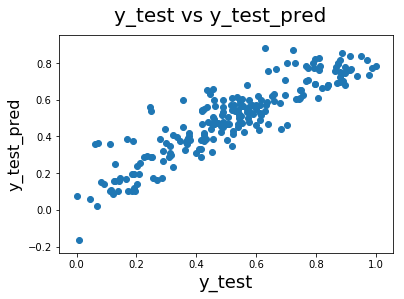

In [415]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)          
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16)                      

# Step 7 :Final conclusions and Recommendations

1. R-squared of our train data model is 0.832 ie 83.2%
2. R-squared of test data model is 0.797 ie 79.7%
The diffrence between them is less than 5 percent(so the model is acceptable)

## Equation of our MLR is:
cnt = 0.258 + (0.234 X year) + (0.4493 X temp) + (0.043 X Season_Winter) + (0.052 X September) - (0.1410 X windspeed) - (0.114 X Season_Spring) - (0.06 X July) - (0.044 X Sunday) - (0.286 X Light_Snow_Rain) - (0.080 X Mist_Cloudy)

Below are the 3 variables that are contributing significantly towards explaining the demand of the shared bike:

a. Temp: As the coefficient of ’temp’ is the highest and since it is positive, so the change in Temp feature will directly affect the demand for bikes.

b. Light_Snow_Rain: As the coefficient of ‘Light_Snow_Rain’ is the second highest and since it is negative, change in ‘Light_Snow_Rain’ feature will inversely affect the demand for bikes.

c. Year: As the coefficient of ‘Year’ is the third highest and since it is positive, the change in Year feature will directly affect the demand for bikes.